# Customers Segmentation

A wholesale distributor recently tested a change to their delivery method for some customers, by moving from a morning delivery service five days a week to a cheaper evening delivery service three days a week.Initial testing did not discover any significant unsatisfactory results, so they implemented the cheaper option for all customers. Almost immediately, the distributor began getting complaints about the delivery service change and customers were canceling deliveries — losing the distributor more money than what was being saved. You’ve been hired by the wholesale distributor to find what types of customers they have to help them make better, more informed business decisions in the future. Your task is to use unsupervised learning techniques to see if any similarities exist between customers, and how to best segment customers into distinct categories.  
The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.


In [1]:
# import library:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import dataset:
data= pd.read_csv("customers.csv")

In [3]:
#data exploring:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [8]:
data.shape

(440, 8)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicatessen      440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [11]:
data_2 = data.drop(columns =["Channel", "Region"])

In [12]:
data_2.shape

(440, 6)

## Data Preprocessing:

In [14]:
# StandardScaler/ standardized:
##import library:
from sklearn.preprocessing import StandardScaler
#define scaler function:
def scale(df):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(data_2)
    return df_scaled

#fit dataset to scaler function:


#transform dataset:
data_scaler= scale(data_2)



In [15]:
## Feature Transformation using PCA
from sklearn.decomposition import PCA
pca = PCA().fit(data_scaler)

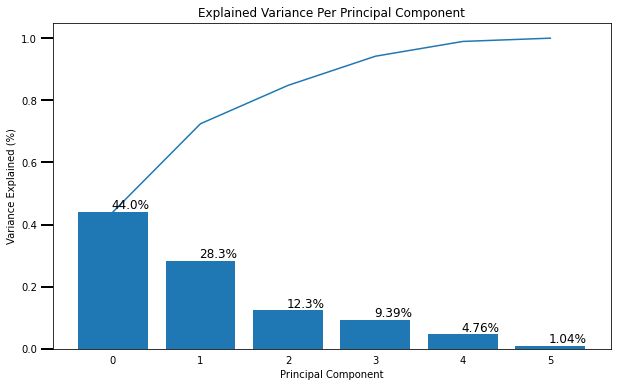

In [16]:
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

scree_plot(pca)

In [17]:
#define pca and set number of n_components :
pca = PCA(n_components = 2)

#fit dataset to pca:
#transform dataset:
data_3 = pca.fit_transform(data_scaler)

# Build unsupervised model:

In [18]:
#build the model:
# import library:
from sklearn.cluster import KMeans
#intiate a model with number of clusters if applicable:


# Fit the model to your data using the fit method


# Finally predict the labels



In [21]:
# Kmeans function
def kmeans_score(df, k):
    kmeans = KMeans(n_clusters = k)
    model = kmeans.fit(X = df)
    score = model.score(df)
    return score

In [29]:
# Elbow method
scores = []
k_values = np.arange(1, 6, 1)

for k in k_values:
    scores.append(np.absolute(kmeans_score(data_3, k)))

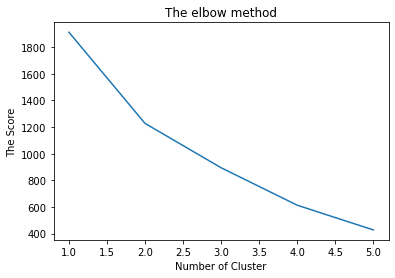

In [30]:
plt.plot(k_values, scores)
plt.xlabel("Number of Cluster")
plt.ylabel("The Score")
plt.title("The elbow method")
plt.show()

In [31]:
# Label prediction
kmeans = KMeans(n_clusters = 2)

# Predicting
labels = kmeans.fit_predict(X = data_3)

In [32]:
data["labels"] = pd.Series(labels)

In [33]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0


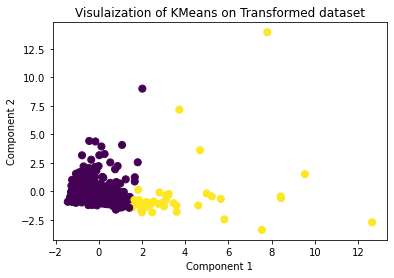

In [53]:
# Visulaization
plt.scatter(data_3[:,0], data_3[:,1], s=50, c=labels, cmap ='viridis')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Visulaization of KMeans on Transformed dataset")

plt.show()

In [44]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,